In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\airline-safety.csv')
df

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


C:\Python Folder\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


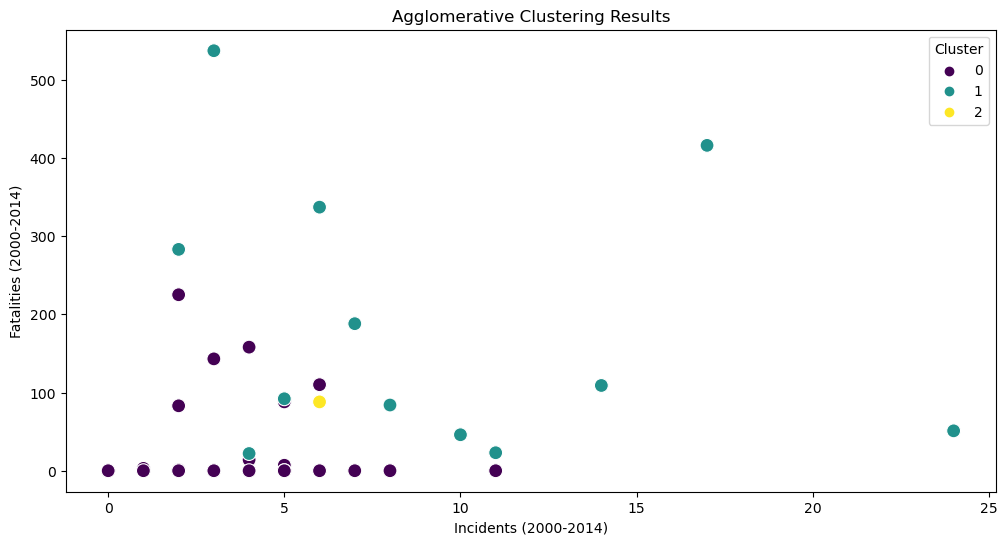

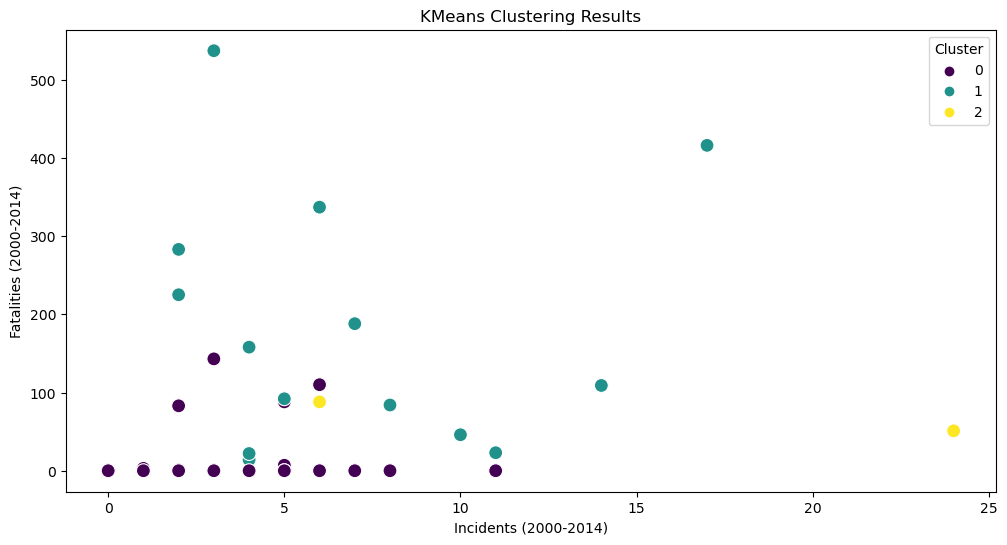

                 airline  Agglomerative_Cluster  KMeans_Cluster
0             Aer Lingus                      0               0
1              Aeroflot*                      2               2
2  Aerolineas Argentinas                      0               0
3            Aeromexico*                      0               0
4             Air Canada                      0               0
Comparison between Agglomerative and KMeans clustering shows the grouping pattern. Check for similarities or differences in cluster assignment.


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv'
data = pd.read_csv(dataset_url)

# Select relevant features for clustering
features = [
    'incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99',
    'incidents_00_14', 'fatal_accidents_00_14', 'fatalities_00_14'
]
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Agglomerative Clustering ----
agglomerative_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglomerative_labels = agglomerative_model.fit_predict(X_scaled)

# Add labels to the dataframe
data['Agglomerative_Cluster'] = agglomerative_labels

# ---- KMeans Clustering (used as a proxy for divisive clustering) ----
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

# Add labels to the dataframe
data['KMeans_Cluster'] = kmeans_labels

# ---- Visualizations ----
# Plotting clustering results
plt.figure(figsize=(12, 6))
sns.scatterplot(x='incidents_00_14', y='fatalities_00_14', hue='Agglomerative_Cluster', data=data, palette='viridis', s=100)
plt.title('Agglomerative Clustering Results')
plt.xlabel('Incidents (2000-2014)')
plt.ylabel('Fatalities (2000-2014)')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='incidents_00_14', y='fatalities_00_14', hue='KMeans_Cluster', data=data, palette='viridis', s=100)
plt.title('KMeans Clustering Results')
plt.xlabel('Incidents (2000-2014)')
plt.ylabel('Fatalities (2000-2014)')
plt.legend(title='Cluster')
plt.show()

# ---- Comparing Results ----
comparison = data[['airline', 'Agglomerative_Cluster', 'KMeans_Cluster']]
print(comparison.head())

# ---- Summary Comment ----
print("Comparison between Agglomerative and KMeans clustering shows the grouping pattern. Check for similarities or differences in cluster assignment.")


In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [3]:
df.drop(['ID'], axis = 1, inplace=True)

In [7]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

In [8]:
data

array([[ 1.82326796e-01, -2.15289653e-01,  8.47104586e-01,
         8.26954328e-01, -1.11585619e+00,  1.89814564e+00,
        -1.47928757e-01, -2.91863354e+00],
       [ 2.64486401e-01, -3.16047087e-01, -3.07975490e-01,
         6.47288655e-01, -4.77473766e-04,  2.30981876e-01,
        -5.78209731e-01, -1.73685554e-01],
       [-1.13222689e+00,  2.07891572e-01,  2.68303293e-02,
        -6.10371051e-01,  1.95143528e+00, -1.33252403e+00,
        -7.20244228e-01, -4.35109172e-01],
       [-1.05006729e+00,  3.15000866e+00, -1.14499004e+00,
        -2.22736210e+00,  1.15672795e+00, -1.05610310e+00,
        -1.37193192e+00, -2.13436269e+00],
       [ 1.49688048e+00,  2.88497520e-01, -5.08858981e-01,
         1.54561702e+00, -1.39899814e-01, -1.55711604e+00,
         2.69819763e-01,  2.18449872e-01],
       [ 8.39603639e-01, -3.56350061e-01, -1.64719877e+00,
         2.87957311e-01, -2.13908247e-02, -2.00925833e-01,
        -5.48967335e-01, -1.73685554e-01],
       [ 5.10965218e-01, -9.438073

In [11]:
linkage_matrix = sch.linkage(df, method='complete')

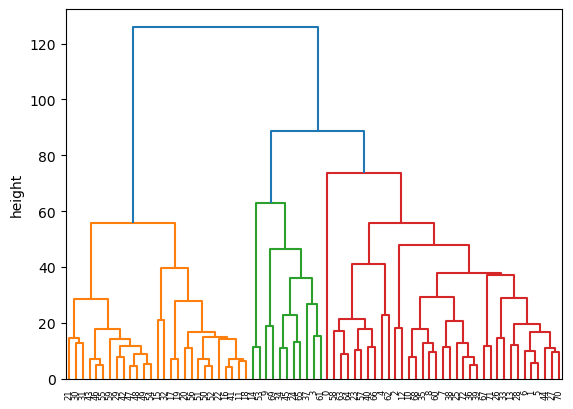

In [12]:
# plot dendogram
dendogram = sch.dendrogram(linkage_matrix)
plt.ylabel('height')
plt.savefig('dendogram.png', dpi=300)

In [13]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='complete')

In [14]:
cluster_preds = cluster.fit_predict(data)
print(cluster_preds)

[0 3 3 1 3 3 3 3 3 3 3 0 4 3 1 0 0 0 0 0 0 0 0 0 1 3 3 3 3 0 0 0 0 3 3 3 3
 1 3 3 4 0 0 0 3 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 1 2 3 3 1 4 3 3 3 3 3 3]


What does cluster 3/1 mean? All it is telling us is that cluster 0 and cluster 1 are different. Doesn't mean that cluster 0,1 are similar compared to 0,2. Until we assign meaning, these are just labels.

## K-means clustering

In [15]:
df = pd.read_csv('iris.csv')

In [16]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
from sklearn.cluster import KMeans

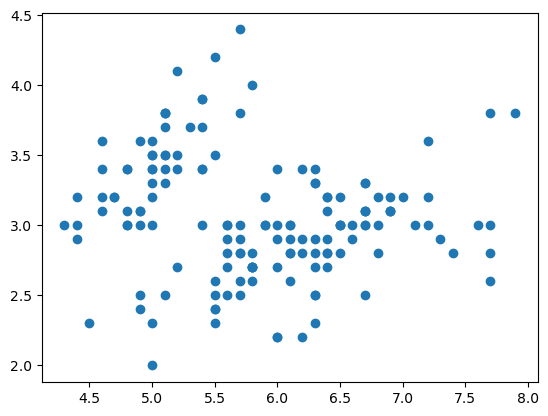

In [24]:
#Ignore the last column
x = df.iloc[:,0]
y = df.iloc[:,1]
plt.scatter(x,y)

In [20]:
kmeans = KMeans(n_clusters=5)

In [21]:
# Declaring the clusters
y_means = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

C:\Python Folder\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


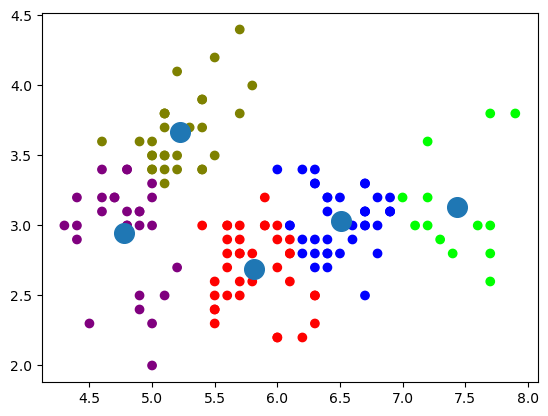

In [33]:
# Plot the clusters
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=kmeans.labels_,cmap='brg')
plt.scatter(centroids[:,0],centroids[:,1], s=200, )

In [ ]:
df= pd.read